# Feature Engineering

## Feature Understanding

- Structured versus unstructured data
- The four levels of data
- Identifying missing data values
- Exploratory data analysis
- Descriptive statistics
- Data visualizations


## Feature Improvement

- Structuring unstructured data
- Data imputing—inserting data where there was not a data before (missing data)
- Normalization of data

In [122]:
import pandas as pd  # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns  # another popular data visualization tool
%matplotlib inline  
plt.style.use('fivethirtyeight')  # a popular data visualization theme
import warnings
warnings.filterwarnings('ignore')

In [3]:
pima = pd.read_csv('../data/pima.data')

In [4]:
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']

In [98]:
pima = pd.read_csv('../data/pima.data', names=pima_column_names)

In [99]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Null Accuracy or Baseline
pima['onset_diabetes'].value_counts(normalize=True) 

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

In [10]:
pima.isnull().sum() 

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [11]:
pima.describe() 

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x != 0 else None)
# manually replace all 0's with a None value

In [13]:
pima['serum_insulin'].isnull().sum()

374

In [14]:

for col in ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']:
    pima[col].replace([0], [None], inplace=True)

In [15]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [16]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
pima_imputed = imputer.fit_transform(pima)
type(pima_imputed) 

numpy.ndarray

In [23]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)

In [24]:
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [25]:
pima_imputed.isnull().sum()  # no missing values

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [ ]:
pima_dropped = pima.dropna()

In [91]:
# note we are using the dataset with the dropped rows

from sklearn.neighbors import KNeighborsClassifier

X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
y_dropped = pima_dropped['onset_diabetes']

In [92]:
from sklearn.model_selection import train_test_split

# using the same random state to obtain the same split
X_train, X_test, y_train, y_test = train_test_split(X_dropped,y_dropped,random_state=99)

In [95]:
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.7244897959183674


In [96]:
from sklearn.model_selection import GridSearchCV

# our grid search variables and instances

# KNN parameters to try
knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

print(grid.best_score_, grid.best_params_)

0.7348263550795197 {'n_neighbors': 7}


In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

#knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

# must redefine params to fit the pipeline

knn = KNeighborsClassifier()  # instantiate a KNN model

#X = pima.drop('onset_diabetes', axis=1)
#y = pima['onset_diabetes']

mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), ('standardize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']
grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7565232153467447 {'classify__n_neighbors': 5, 'imputer__strategy': 'mean'}


## Feature Selection

- Correlation coefficients
- Identifying and removing multicollinearity
- Chi-squared tests
- Anova tests
- Interpretation of p-values
- Iterative feature selection
- Using machine learning to measure entropy and information gain

Feature Selection: The process of selecting which features, from the original batch of features, are the best when it comes to the model prediction pipeline. Given n features, we search for a subset of k, where k < n features that improve our machine learning pipeline

In [110]:
# import out grid search module
from sklearn.model_selection import GridSearchCV


def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, # the model to grid search
                        params, # the parameter set to try 
                        error_score=0.) # if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid.fit(X, y) # fit the model and parameters
    # our classical metric for performance
    print(("Best Accuracy: {}".format(grid.best_score_)))
    # the best parameters that caused the best accuracy
    print("Best Parameters: {}".format(grid.best_params_))
    # the average time it took a model to fit to the data (in seconds)
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # the average time it took a model to predict out of sample data (in seconds)
    # this metric gives us insight into how this model will perform in real-time analysis
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [111]:
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
credit_card_default = pd.read_csv('../data/credit_card_default.csv')

In [113]:
credit_card_default.shape 

(30000, 24)

In [114]:
credit_card_default.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [115]:
credit_card_default.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [116]:
# Create our feature matrix
X = credit_card_default.drop('default payment next month', axis=1)

# create our response variable
y = credit_card_default['default payment next month']

In [117]:
# get our null accuracy rate
y.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

## Creating a baseline machine learning pipeline
- Logistic Regression
- K-Nearest Neighbors
- Decision Tree
- Random Forest

In [118]:
# Import four machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [119]:
# Set up some parameters for our grid search
# We will start with four different machine learning model parameters

# Logistic Regression
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}

# KNN
knn_params = {'n_neighbors': [1, 3, 5, 7]}

# Decision Tree
tree_params = {'max_depth':[None, 1, 3, 5, 7]}

# Random Forest
forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3, 5, 7]}

In [120]:
# instantiate the four machine learning models
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [123]:
get_best_model_and_accuracy(lr, lr_params, X, y)

Best Accuracy: 0.7788333333333334
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Average Time to Fit (s): 0.146
Average Time to Score (s): 0.001


In [124]:
get_best_model_and_accuracy(knn, knn_params, X, y)

Best Accuracy: 0.7617333333333333
Best Parameters: {'n_neighbors': 7}
Average Time to Fit (s): 0.039
Average Time to Score (s): 0.788


In [127]:
# bring in some familiar modules for dealing with this sort of thing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# construct pipeline parameters based on the parameters
# for KNN on its own
knn_pipe_params = {'classifier__{}'.format(k): v for k, v in knn_params.items()}

# KNN requires a standard scalar due to using Euclidean distance # as the main equation for predicting observations
knn_pipe = Pipeline([('scale', StandardScaler()), ('classifier', knn)])

# quick to fit, very slow to predict
get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y)

print(knn_pipe_params)

Best Accuracy: 0.7993333333333333
Best Parameters: {'classifier__n_neighbors': 7}
Average Time to Fit (s): 0.07
Average Time to Score (s): 7.981
{'classifier__n_neighbors': [1, 3, 5, 7]}


In [128]:
get_best_model_and_accuracy(d_tree, tree_params, X, y)

Best Accuracy: 0.8206333333333333
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.214
Average Time to Score (s): 0.003


In [129]:
get_best_model_and_accuracy(forest, forest_params, X, y)

Best Accuracy: 0.8198333333333334
Best Parameters: {'max_depth': 7, 'n_estimators': 100}
Average Time to Fit (s): 1.683
Average Time to Score (s): 0.039


### Statistical-based feature selection

 Pearson correlations

 hypothesis testing

In [130]:
credit_card_default.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


<AxesSubplot:>

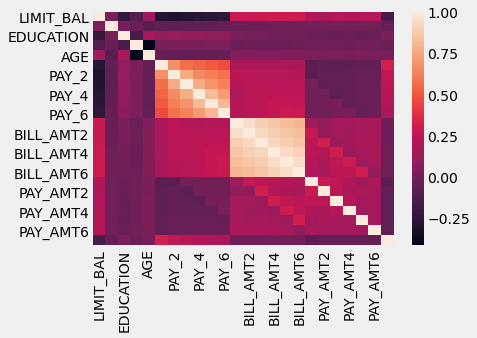

In [131]:
# using seaborn to generate heatmaps
import seaborn as sns
import matplotlib.style as style
# Use a clean stylizatino for our charts and graphs
style.use('fivethirtyeight')

sns.heatmap(credit_card_default.corr())

In [132]:
# just correlations between every feature and the response
credit_card_default.corr()['default payment next month'] 

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [135]:
# filter only correlations stronger than .2 in either direction (positive or negative)

credit_card_default.corr()['default payment next month'].abs()  > .2

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                          True
PAY_2                          True
PAY_3                          True
PAY_4                          True
PAY_5                          True
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month     True
Name: default payment next month, dtype: bool

In [136]:
# store the features
highly_correlated_features = credit_card_default.columns[credit_card_default.corr()['default payment next month'].abs() > .2]

highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'default payment next month'],
      dtype='object')

In [137]:
# drop the response variable
highly_correlated_features = highly_correlated_features.drop('default payment next month')

highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], dtype='object')

In [139]:
# only include the five highly correlated features
X_subsetted = X[highly_correlated_features]

get_best_model_and_accuracy(d_tree, tree_params, X_subsetted, y) 

Best Accuracy: 0.8213333333333332
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.012
Average Time to Score (s): 0.003


In [142]:
from sklearn.base import TransformerMixin, BaseEstimator

class CustomCorrelationChooser(TransformerMixin, BaseEstimator):
    def __init__(self, response, cols_to_keep=[], threshold=None):
        # store the response series
        self.response = response
        # store the threshold that we wish to keep
        self.threshold = threshold
        # initialize a variable that will eventually
        # hold the names of the features that we wish to keep
        self.cols_to_keep = cols_to_keep
        
    def transform(self, X):
        # the transform method simply selects the appropiate
        # columns from the original dataset
        return X[self.cols_to_keep]
        
    def fit(self, X, *_):
        # create a new dataframe that holds both features and response
        df = pd.concat([X, self.response], axis=1)
        # store names of columns that meet correlation threshold
        self.cols_to_keep = df.columns[df.corr()[df.columns[-1]].abs() > self.threshold]
        # only keep columns in X, for example, will remove response variable
        self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
        return self

In [143]:
# instantiate our new feature selector
ccc = CustomCorrelationChooser(threshold=.2, response=y)
ccc.fit(X)

ccc.cols_to_keep

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [151]:
type(knn_pipe_params)
tree_pipe_params = {'classifier__{}'.format(k): v for k, v in tree_params.items()}


In [152]:
# instantiate our feature selector with the response variable set
ccc = CustomCorrelationChooser(response=y)

# make our new pipeline, including the selector
ccc_pipe = Pipeline([('correlation_select', ccc), ('classifier', d_tree)])

# make a copy of the decisino tree pipeline parameters
ccc_pipe_params = tree_pipe_params.copy()

# update that dictionary with feature selector specific parameters
ccc_pipe_params.update({
 'correlation_select__threshold':[0, .1, .2, .3]})

print(ccc_pipe_params)

get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y) 


{'classifier__max_depth': [None, 1, 3, 5, 7], 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best Accuracy: 0.8207333333333333
Best Parameters: {'classifier__max_depth': 3, 'correlation_select__threshold': 0.2}
Average Time to Fit (s): 0.11
Average Time to Score (s): 0.004


In [153]:
# check the threshold of .1
ccc = CustomCorrelationChooser(threshold=0.1, response=y)
ccc.fit(X)

# check which columns were kept
ccc.cols_to_keep

['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

### Feature selection using hypothesis testing

Hypothesis testing will attempt to select only the best features
from a dataset with the help of p-value

A hypothesis test is a statistical test that is used to figure out whether we can apply a certain condition for an entire population, given a data sample. The result of a hypothesis test tells us whether we should believe the hypothesis or reject it for an alternative one. Based on sample data from a population, a hypothesis test determines whether or not to reject the null hypothesis. We usually use a p-value (a non-negative decimal with an upper bound of 1, which is based on our significance level) to make this conclusion.

In the case of feature selection, the hypothesis we wish to test is along the lines of: True or False: This feature has no relevance to the response variable. We want to test this hypothesis for every feature and decide whether the features hold some significance in the prediction of the response.

The p-values are a decimals between 0 and 1 that represent the probability that the data given to us occurred by chance under the hypothesis test. Simply put, the lower the p-value, the better the chance that we can reject the null hypothesis. For our purposes, the smaller the p-value, the better the chances that the feature has some relevance to our response variable and we should keep it.

In [156]:
# SelectKBest selects features according to the k highest scores of a given scoring function
from sklearn.feature_selection import SelectKBest

# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif

# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values
# regression has its own statistical tests

#f_classif function will perform an ANOVA test (a type of hypothesis test) on each feature on
#its own and assign that feature a p-value. 
#The SelectKBest will rank the features by that p-value (the lower the better) 
#and keep only the best k (a human input) features.

In [157]:
# keep only the best five features according to p-values of ANOVA test
k_best = SelectKBest(f_classif, k=5)

In [158]:
# matrix after selecting the top 5 features
k_best.fit_transform(X, y)

array([[ 2,  2, -1, -1, -2],
       [-1,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       ...,
       [ 4,  3,  2, -1,  0],
       [ 1, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [159]:
# get the p values of columns
k_best.pvalues_

# make a dataframe of features and p-values
# sort that dataframe by p-value
p_values = pd.DataFrame({'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')

# show the top 5 features
p_values.head()

,column,p_value
5,PAY_0,0.000000e+00
6,PAY_2,0.000000e+00
7,PAY_3,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279


In [160]:
# features with a low p value
p_values[p_values['p_value'] < .05]

,column,p_value
5,PAY_0,0.000000e+00
6,PAY_2,0.000000e+00
7,PAY_3,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279
10,PAY_6,7.296740e-234
0,LIMIT_BAL,1.302244e-157
17,PAY_AMT1,1.146488e-36
18,PAY_AMT2,3.166657e-24
20,PAY_AMT4,6.830942e-23


In [161]:
# features with a high p value
p_values[p_values['p_value'] >= .05]

,column,p_value
14,BILL_AMT4,0.078556
15,BILL_AMT5,0.241634
16,BILL_AMT6,0.352123


In [170]:
k_best = SelectKBest(f_classif)

# Make a new pipeline with SelectKBest
select_k_pipe = Pipeline([('k_best', k_best), ('classifier', d_tree)])

select_k_best_pipe_params = tree_pipe_params.copy()
select_k_best_pipe_params.update({'k_best__k':range(1,23)})

print(select_k_best_pipe_params)
# {'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'all'], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}

# comparable to our results with correlationchooser
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)

{'classifier__max_depth': [None, 1, 3, 5, 7], 'k_best__k': range(1, 23)}
Best Accuracy: 0.8213333333333332
Best Parameters: {'classifier__max_depth': 3, 'k_best__k': 5}
Average Time to Fit (s): 0.087
Average Time to Score (s): 0.004


In [171]:
k_best = SelectKBest(f_classif, k=5)

p_values.head()

,column,p_value
5,PAY_0,0.000000e+00
6,PAY_2,0.000000e+00
7,PAY_3,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279


In [172]:
# sanity check
# If we only the worst columns
the_worst_of_X = X[X.columns.drop(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])]

# goes to show, that selecting the wrong features will 
# hurt us in predictive performance
get_best_model_and_accuracy(d_tree, tree_params, the_worst_of_X, y)

Best Accuracy: 0.7829333333333333
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.203
Average Time to Score (s): 0.003


### Model-based feature selection

In [174]:
# create a brand new decision tree classifier
tree = DecisionTreeClassifier()

tree.fit(X, y)

DecisionTreeClassifier()

In [177]:
# note that we have some other features in play besides what our last two selectors decided for us

importances = pd.DataFrame({'importance': tree.feature_importances_, 'feature':X.columns}).sort_values('importance', ascending=False)

importances.head()

,importance,feature
5,0.161749,PAY_0
4,0.071009,AGE
11,0.070079,BILL_AMT1
0,0.060317,LIMIT_BAL
19,0.057333,PAY_AMT3


In [178]:
# similar to SelectKBest, but not with statistical tests
from sklearn.feature_selection import SelectFromModel

In [179]:
# instantiate a class that choses features based
# on feature importances according to the fitting phase
# of a separate decision tree classifier
select_from_model = SelectFromModel(DecisionTreeClassifier(), 
 threshold=.05)

In [180]:
selected_X = select_from_model.fit_transform(X, y)
selected_X.shape

(30000, 6)

In [181]:
# to speed things up a bit in the future
tree_pipe_params = {'classifier__max_depth': [1, 3, 5, 7]}

from sklearn.pipeline import Pipeline

# create a SelectFromModel that is tuned by a DecisionTreeClassifier
select = SelectFromModel(DecisionTreeClassifier())

select_from_pipe = Pipeline([('select', select),
                             ('classifier', d_tree)])

select_from_pipe_params = tree_pipe_params.copy()

select_from_pipe_params.update({
 'select__threshold': [.01, .05, .1, .2, .25, .3, .4, .5, .6, "mean", "median", "2.*mean"],
 'select__estimator__max_depth': [None, 1, 3, 5, 7]
 })

print(select_from_pipe_params)
# {'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__max_depth': [None, 1, 3, 5, 7], 'classifier__max_depth': [1, 3, 5, 7]}

get_best_model_and_accuracy(select_from_pipe, select_from_pipe_params, X, y)

{'classifier__max_depth': [1, 3, 5, 7], 'select__threshold': [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 'mean', 'median', '2.*mean'], 'select__estimator__max_depth': [None, 1, 3, 5, 7]}
Best Accuracy: 0.8208333333333332
Best Parameters: {'classifier__max_depth': 3, 'select__estimator__max_depth': None, 'select__threshold': 0.01}
Average Time to Fit (s): 0.247
Average Time to Score (s): 0.003


In [182]:
# set the optimal params to the pipeline
select_from_pipe.set_params(**{'select__threshold': 0.01, 
 'select__estimator__max_depth': None, 
 'classifier__max_depth': 3})

# fit our pipeline to our data
select_from_pipe.steps[0][1].fit(X, y)

# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
X.columns[select_from_pipe.steps[0][1].get_support()]

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [183]:
# a new selector that uses the coefficients from a regularized logistic regression as feature importances
logistic_selector = SelectFromModel(LogisticRegression())

# make a new pipeline that uses coefficients from LogistisRegression as a feature ranker
regularization_pipe = Pipeline([('select', logistic_selector), 
 ('classifier', tree)])

regularization_pipe_params = tree_pipe_params.copy()

# try l1 regularization and l2 regularization
regularization_pipe_params.update({
 'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
 'select__estimator__penalty': ['l1', 'l2'],
 })

print(regularization_pipe_params)
# {'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'classifier__max_depth': [1, 3, 5, 7], 'select__estimator__penalty': ['l1', 'l2']}


get_best_model_and_accuracy(regularization_pipe,regularization_pipe_params,X, y)

{'classifier__max_depth': [1, 3, 5, 7], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2']}
Best Accuracy: 0.8204333333333332
Best Parameters: {'classifier__max_depth': 5, 'select__estimator__penalty': 'l2', 'select__threshold': 'median'}
Average Time to Fit (s): 0.195
Average Time to Score (s): 0.001


In [186]:
# set the optimal params to the pipeline
regularization_pipe.set_params(**{'select__threshold': 0.01, 
 'classifier__max_depth': 5, 
 'select__estimator__penalty': 'l2',
'select__threshold': 'median'})

# fit our pipeline to our data
regularization_pipe.steps[0][1].fit(X, y)

# list the columns that the Logisti Regression selected by calling the get_support() method from SelectFromModel
X.columns[regularization_pipe.steps[0][1].get_support()]

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2'],
      dtype='object')

### Choosing the right feature selection method

If your features are mostly categorical, you should start by trying to 
implement a SelectKBest with a Chi2 ranker or a tree-based model selector.

If your features are largely quantitative (like ours were), 
using linear models as model-based selectors and relying on 
correlations tends to yield greater results

If you are solving a binary classification problem, using a Support Vector Classification 
model along with a SelectFromModel selector will probably fit nicely, 
as the SVC tries to find coefficients to optimize for binary classification tasks.

A little bit of EDA can go a long way in manual feature selection. 
The importance of having domain knowledge in the domain from which 
the data originated cannot be understated.

## Feature Construction

- Creating brand new features and placing them correctly within our dataset
- Will help to improve model performance

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


In [101]:
from sklearn.base import TransformerMixin

class CustomEncoder(TransformerMixin):
    def __init__(self, col, ordering=None):
        self.ordering = ordering
        self.col = col
        
    def transform(self, df):
        X = df.copy()
        X[self.col] = X[self.col].map(lambda x: self.ordering.index(x))
        return X
    
    def fit(self, *_):
        return self

In [102]:
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
ce = CustomEncoder(col='Bridge_Types', ordering = ['Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable'])
#ce.fit_transform(bridge_df)
bridge_df['Bridge_Types_Cat'] = ce.fit_transform(bridge_df)
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,2
3,Cantilever,3
4,Tied Arch,4
5,Suspension,5
6,Cable,6


In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())
# merge with main df bridge_df on key values
bridge_df = bridge_df.join(enc_df)
bridge_df

,Bridge_Types,Bridge_Types_Cat,0,1,2,3,4,5,6
0,Arch,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beam,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Truss,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cantilever,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Tied Arch,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Suspension,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Cable,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [103]:
import pandas as pd
import numpy as np
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(bridge_df, columns=["Bridge_Types"], prefix=["Type_is"] )
# merge with main df bridge_df on key values
bridge_df = bridge_df.join(dum_df)
bridge_df

,Bridge_Types,Type_is_Arch,Type_is_Beam,Type_is_Cable,Type_is_Cantilever,Type_is_Suspension,Type_is_Tied Arch,Type_is_Truss
0,Arch,1,0,0,0,0,0,0
1,Beam,0,1,0,0,0,0,0
2,Truss,0,0,0,0,0,0,1
3,Cantilever,0,0,0,1,0,0,0
4,Tied Arch,0,0,0,0,0,1,0
5,Suspension,0,0,0,0,1,0,0
6,Cable,0,0,1,0,0,0,0


In [105]:
pima['age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

In [107]:
pd.cut(pima['age'], bins=4)


0       (36.0, 51.0]
1      (20.94, 36.0]
2      (20.94, 36.0]
3      (20.94, 36.0]
4      (20.94, 36.0]
           ...      
763     (51.0, 66.0]
764    (20.94, 36.0]
765    (20.94, 36.0]
766     (36.0, 51.0]
767    (20.94, 36.0]
Name: age, Length: 768, dtype: category
Categories (4, interval[float64]): [(20.94, 36.0] < (36.0, 51.0] < (51.0, 66.0] < (66.0, 81.0]]

In [109]:
pima['age_cut_bin'] = pd.cut(pima['age'], bins=[11, 25, 40, 90])


In [90]:
print(pima['age'].head(),pima['age_cut_bin'].head())

0    50
1    31
2    32
3    21
4    33
Name: age, dtype: int64 0    (40, 90]
1    (25, 40]
2    (25, 40]
3    (11, 25]
4    (25, 40]
Name: age_cut_bin, dtype: category
Categories (3, interval[int64]): [(11, 25] < (25, 40] < (40, 90]]


## Feature Transformation

-  Automatic creation of these features as it applies to mathematical dimensionality.
- Principal Component Analysis

## Feature Learning
- Architecture attempting to understand and model data in such a way that it 
will exploit patterns in data in order to create new data.
- Word2Vec